<a href="https://colab.research.google.com/github/Adricarpin/TensorFlow-notebooks/blob/master/NLP/Sentiment_analysis_Disaster_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dowload Dataset

In [ ]:
! pip install kaggle


In [ ]:
! mkdir ~/.kaggle


In [ ]:
from google.colab import files

In [ ]:
files.upload()

In [ ]:
! cp kaggle.json ~/.kaggle/


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
! kaggle competitions download -c nlp-getting-started

  0% 0.00/411k [00:00<?, ?B/s]
100% 411k/411k [00:00<00:00, 62.1MB/s]
  0% 0.00/965k [00:00<?, ?B/s]
100% 965k/965k [00:00<00:00, 29.5MB/s]
  0% 0.00/22.2k [00:00<?, ?B/s]
100% 22.2k/22.2k [00:00<00:00, 22.2MB/s]


# Preprocessing

In [ ]:
import pandas as pd

In [ ]:
train_df = pd.read_csv('train.csv')

In [ ]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
# shuffle data
train_df = train_df.sample(frac=1)

In [ ]:
train_df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
# visualize some samples
import random

for i in range(5):
  random_index = random.randint(0, len(train_df))
  print(train_df['text'].iloc[random_index])
  print(train_df['target'].iloc[random_index])
  print("---\n")

There has not been 1 real tear out of #Shelli 's eyes this entire episode. #bb17
0
---

I guess ill never be able to go to mayhem...
0
---

I was over here dreaming peacefully then that loud ass thunder wanted to scare me. ??
1
---

That horrible sinking feeling when youÛªve been at home on your phone for a while and you realise its been on 3G this whole time.
0
---

Brain twister homefolks are opinionated over against proposal modernized canada: oMw
0
---



In [ ]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(train_df['text'].to_numpy(),
                                                  train_df['target'].to_numpy(),
                                                  test_size=0.1)


# Tokenization

In order to Tokenize we need to specify a lenght for all the tokenized sentences and the size of the vocabulary. Let's find good parameters for both.

In [ ]:
# sentene size average
round(sum(len(i.split(" "))for i in train_X)/len(train_X))



15

In [ ]:
# Show size of the vocabulary

len(set(' '.join(train_X).split(" ")))

# ' '.join joins all the values in the np.array
# split(" ") splits by white space
# set() convert the list to a set of unique values


29652

In [ ]:
# set Tokenizer
from tensorflow.keras.layers import TextVectorization

max_vocab_length = 10000
max_length = 15


text_vectorizer = TextVectorization(max_tokens = max_vocab_length,
                                    output_sequence_length = max_length)

In [ ]:
text_vectorizer.adapt(train_X)

In [ ]:
# random sentence

random_sentence = random.choice(train_X)
print(random_sentence)
text_vectorizer([random_sentence])

Uribe just obliterated a baseball.


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[3259,   28,  483,    3, 1904,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [ ]:
# check the words in the vocabulary

vocabulary = text_vectorizer.get_vocabulary()

print(f"Size of the vocabulary: {len(vocabulary)}")
print(f"Top 5 most common words: {vocabulary[:10]}")
print(f"Top 5 less common words: {vocabulary[-10:]}")

Size of the vocabulary: 10000
Top 5 most common words: ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is']
Top 5 less common words: ['pandora', 'pandemoniumiso', 'panda', 'panay', 'panama', 'pan', 'pams', 'pampered', 'pampalmater', 'palmoil']


# Embedding

In [ ]:
from tensorflow.keras import layers

In [ ]:
embedding = layers.Embedding(input_dim = max_vocab_length,
                             output_dim = 128,
                             input_length = max_length)

In [ ]:
# random sentence

random_sentence = random.choice(train_X)

print(random_sentence)
print("---\n")
print(text_vectorizer([random_sentence]))
print("---\n")
print(embedding(text_vectorizer([random_sentence])))
print("---\n")

print(f"sentence length: {len(random_sentence)}")
print(f"tokenizer vector shape: {text_vectorizer([random_sentence]).shape}")
print(f"embedding shape: {embedding(text_vectorizer([random_sentence])).shape}")


@lauren_miller_7 she won't harm you
---

tf.Tensor([[  1 205 614 365  12   0   0   0   0   0   0   0   0   0   0]], shape=(1, 15), dtype=int64)
---

tf.Tensor(
[[[-0.01157458  0.04921461 -0.04929483 ... -0.01241614  0.00243498
   -0.02356727]
  [ 0.02033425 -0.02430183  0.00327678 ...  0.01314323  0.00556104
   -0.01779706]
  [ 0.00227452 -0.03251087 -0.02050589 ... -0.02136606 -0.04120754
   -0.02279681]
  ...
  [ 0.03122913 -0.00161781  0.02779105 ... -0.03231294 -0.02499832
    0.03883935]
  [ 0.03122913 -0.00161781  0.02779105 ... -0.03231294 -0.02499832
    0.03883935]
  [ 0.03122913 -0.00161781  0.02779105 ... -0.03231294 -0.02499832
    0.03883935]]], shape=(1, 15, 128), dtype=float32)
---

sentence length: 35
tokenizer vector shape: (1, 15)
embedding shape: (1, 15, 128)


# Model 1: TfidfVectorizer + MultinomialNB

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_1 = Pipeline([
                    ("tfidf", TfidfVectorizer()), 
                    ("clf", MultinomialNB())
])

model_1.fit(train_X, train_y)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
model_1_acc= model_1.score(val_X, val_y)
model_1_acc

0.8162729658792651

# Model 2: Simple Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

input = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(input)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x) # if Dense, val_accuracy = 0.65
output = layers.Dense(1, activation='sigmoid')(x)

model_2 = Model(input, output)


In [ ]:
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [ ]:
history_2 = model_2.fit(train_X, 
                      train_y,
                      epochs = 5,
                      validation_data= (val_X, val_y))

Epoch 1/5
215/215 [==============================] - 5s 8ms/step - loss: 0.6140 - accuracy: 0.6939 - val_loss: 0.5021 - val_accuracy: 0.8110
Epoch 2/5
215/215 [==============================] - 1s 6ms/step - loss: 0.4471 - accuracy: 0.8146 - val_loss: 0.4171 - val_accuracy: 0.8307
Epoch 3/5
215/215 [==============================] - 1s 6ms/step - loss: 0.3527 - accuracy: 0.8584 - val_loss: 0.3990 - val_accuracy: 0.8268
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.2905 - accuracy: 0.8879 - val_loss: 0.4026 - val_accuracy: 0.8176
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.2421 - accuracy: 0.9102 - val_loss: 0.4223 - val_accuracy: 0.8084


In [ ]:
model_2_loss, model_2_acc = model_2.evaluate(val_X, val_y)
model_2_acc

24/24 [==============================] - 0s 4ms/step - loss: 0.4223 - accuracy: 0.8084


0.808398962020874

# Model 2.2 Remake with tf.data.Dataset

In [ ]:
# Turn our data into TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_X, train_y))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_X, val_y))

train_dataset

<TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.int64)>

In [ ]:
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<PrefetchDataset shapes: ((None,), (None,)), types: (tf.string, tf.int64)>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

input = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(input)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x) # if Dense, val_accuracy = 0.65
output = layers.Dense(1, activation='sigmoid')(x)

model_2 = Model(input, output)


In [ ]:
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
history_2 = model_2.fit(train_dataset,
                      epochs = 5,
                      validation_data=valid_dataset )

Epoch 1/5
215/215 [==============================] - 2s 7ms/step - loss: 0.5126 - accuracy: 0.8481 - val_loss: 0.4568 - val_accuracy: 0.8123
Epoch 2/5
215/215 [==============================] - 1s 6ms/step - loss: 0.3389 - accuracy: 0.8838 - val_loss: 0.4053 - val_accuracy: 0.8189
Epoch 3/5
215/215 [==============================] - 1s 6ms/step - loss: 0.2703 - accuracy: 0.9045 - val_loss: 0.4038 - val_accuracy: 0.8097
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.2289 - accuracy: 0.9172 - val_loss: 0.4176 - val_accuracy: 0.8058
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.1982 - accuracy: 0.9291 - val_loss: 0.4377 - val_accuracy: 0.8058


# Model 3: LSTM

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
embedding_model_3 = layers.Embedding(input_dim = max_vocab_length,
                             output_dim = 32,
                             input_length = max_length)

input = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(input)
x = embedding_model_3(x)
x = layers.LSTM(32)(x)
output = layers.Dense(1, activation="sigmoid")(x)

model_3 = Model(input, output)

In [ ]:
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])


In [ ]:
history_3 = model_3.fit(train_X, 
                      train_y,
                      epochs = 5,
                      validation_data= (val_X, val_y), batch_size=32)

Epoch 1/5
215/215 [==============================] - 7s 11ms/step - loss: 0.5467 - accuracy: 0.7110 - val_loss: 0.4059 - val_accuracy: 0.8228
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.3431 - accuracy: 0.8597 - val_loss: 0.4135 - val_accuracy: 0.8136
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2432 - accuracy: 0.9057 - val_loss: 0.5009 - val_accuracy: 0.8045
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1774 - accuracy: 0.9391 - val_loss: 0.6227 - val_accuracy: 0.7507
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1441 - accuracy: 0.9482 - val_loss: 0.6352 - val_accuracy: 0.7743


In [ ]:
model_3_loss, model_3_acc = model_3.evaluate(val_X, val_y)
model_3_acc

24/24 [==============================] - 0s 5ms/step - loss: 0.6352 - accuracy: 0.7743


0.7742782235145569

# Model 4: Convolutional

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
embedding_model_4 = layers.Embedding(input_dim = max_vocab_length,
                             output_dim = 32,
                             input_length = max_length)

input = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(input)
x = embedding_model_3(x)
x = layers.Conv1D(filters = 10,
                  kernel_size = 12,
                  activation = 'relu')(x)
x = layers.GlobalAveragePooling1D()(x)
output = layers.Dense(1, activation="sigmoid")(x)

model_4 = Model(input, output)
               

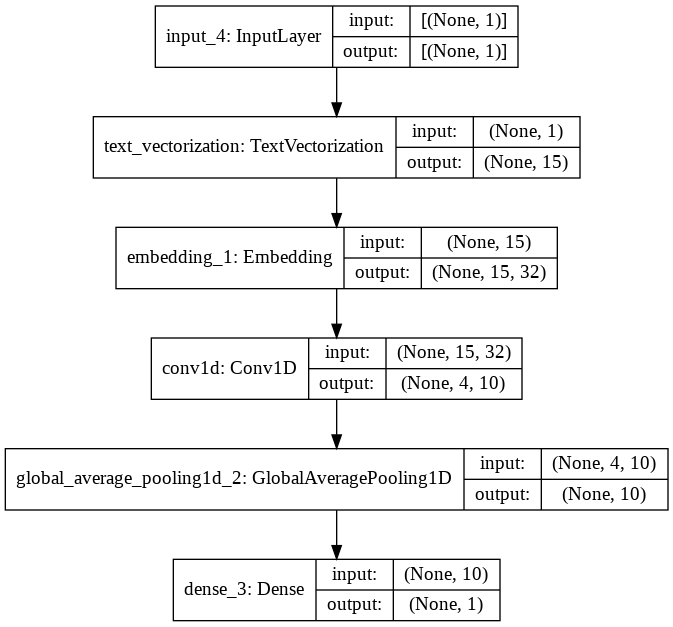

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_4, show_shapes=True)

In [ ]:
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [ ]:
history_4 = model_4.fit(train_X, 
                      train_y,
                      epochs = 5,
                      validation_data= (val_X, val_y))

Epoch 1/5
215/215 [==============================] - 28s 8ms/step - loss: 0.3530 - accuracy: 0.8964 - val_loss: 0.4620 - val_accuracy: 0.7900
Epoch 2/5
215/215 [==============================] - 1s 6ms/step - loss: 0.1732 - accuracy: 0.9391 - val_loss: 0.5596 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 1s 6ms/step - loss: 0.1288 - accuracy: 0.9539 - val_loss: 0.6491 - val_accuracy: 0.7598
Epoch 4/5
215/215 [==============================] - 1s 7ms/step - loss: 0.1068 - accuracy: 0.9610 - val_loss: 0.6983 - val_accuracy: 0.7743
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0908 - accuracy: 0.9667 - val_loss: 0.7717 - val_accuracy: 0.7625


In [ ]:
model_4_loss, model_4_acc = model_4.evaluate(val_X, val_y)
model_4_acc

24/24 [==============================] - 0s 4ms/step - loss: 0.7717 - accuracy: 0.7625


0.7624672055244446

# Model 5: Universal Sentence Encoder

In [ ]:
import tensorflow_hub as hub

from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="USE")

In [ ]:
input = layers.Input(shape=[] , dtype=tf.string)
x = sentence_encoder_layer(input)
x = layers.Dense(64, activation="relu")(x)
output = layers.Dense(1, activation="sigmoid")(x)

model_5 = Model(input, output)

In [ ]:
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [ ]:
history_5 = model_5.fit(train_X, 
                      train_y,
                      epochs = 5,
                      validation_data= (val_X, val_y))

Epoch 1/5
215/215 [==============================] - 7s 19ms/step - loss: 0.5074 - accuracy: 0.7738 - val_loss: 0.4088 - val_accuracy: 0.8294
Epoch 2/5
215/215 [==============================] - 4s 17ms/step - loss: 0.4187 - accuracy: 0.8148 - val_loss: 0.3951 - val_accuracy: 0.8294
Epoch 3/5
215/215 [==============================] - 4s 17ms/step - loss: 0.4052 - accuracy: 0.8197 - val_loss: 0.3961 - val_accuracy: 0.8307
Epoch 4/5
215/215 [==============================] - 4s 17ms/step - loss: 0.3964 - accuracy: 0.8259 - val_loss: 0.3901 - val_accuracy: 0.8281
Epoch 5/5
215/215 [==============================] - 4s 17ms/step - loss: 0.3898 - accuracy: 0.8305 - val_loss: 0.3929 - val_accuracy: 0.8360


In [ ]:
model_5_loss, model_5_acc = model_5.evaluate(val_X, val_y)
model_5_acc

24/24 [==============================] - 0s 15ms/step - loss: 0.3929 - accuracy: 0.8360


0.8359580039978027

# Model 6: Character embedding

In [ ]:
def split_chars(text):
  return " ".join(list(text))

In [ ]:
train_chars = [split_chars(sentence) for sentence in train_X]
val_chars = [split_chars(sentence) for sentence in val_X]


Find tokenizer vector size and vocabulary size


In [ ]:
# sentene size average
len_char = round(sum(len(i.split(" "))for i in train_chars)/len(train_chars))
len_char

115

In [ ]:
# Get all keyboard characters for char-level embedding
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
vocabulary = len(alphabet) + 2 # num characters in alphabet + space + OOV token
char_vectorizer = TextVectorization(max_tokens=vocabulary,  
                                    output_sequence_length = len_char)

char_vectorizer.adapt(train_chars)

In [ ]:
# Check character vocabulary characteristics
char_vocab = char_vectorizer.get_vocabulary()
print(f"Number of different characters in character vocab: {len(char_vocab)}")
print(f"5 most common characters: {char_vocab[:5]}")
print(f"5 least common characters: {char_vocab[-5:]}")

Number of different characters in character vocab: 66
5 most common characters: ['', '[UNK]', 'e', 't', 'a']
5 least common characters: ['«', 'â', 'Â', '´', '¬']


## Embedding

In [ ]:
char_embed = layers.Embedding(input_dim=vocabulary, # number of different characters
                              output_dim=25)

## Model

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
import numpy as np

input = layers.Input(shape=(1,), dtype="string")
x = char_vectorizer(input)
x = char_embed(x)
x = layers.GlobalMaxPool1D()(x)
output = layers.Dense(1, activation="sigmoid")(x)
model_6 = Model(input, output)



In [ ]:
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
history_6 = model_6.fit(np.array(train_chars), 
                      train_y,
                      epochs = 5,
                      validation_data= (np.array(val_chars), val_y))

Epoch 1/5
215/215 [==============================] - 3s 8ms/step - loss: 0.6795 - accuracy: 0.5693 - val_loss: 0.6644 - val_accuracy: 0.5932
Epoch 2/5
215/215 [==============================] - 2s 7ms/step - loss: 0.6624 - accuracy: 0.6021 - val_loss: 0.6484 - val_accuracy: 0.6181
Epoch 3/5
215/215 [==============================] - 2s 7ms/step - loss: 0.6542 - accuracy: 0.6081 - val_loss: 0.6420 - val_accuracy: 0.6273
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.6515 - accuracy: 0.6148 - val_loss: 0.6394 - val_accuracy: 0.6260
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.6499 - accuracy: 0.6142 - val_loss: 0.6390 - val_accuracy: 0.6273


# Model 7: BERT

In [ ]:
! pip install -q -U tensorflow-text


     |████████████████████████████████| 4.4 MB 11.4 MB/s 


In [ ]:
import tensorflow_text
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras import Model

preprocessor = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/2", trainable=False)

inputs = layers.Input(shape=(), dtype="string")
encoder_inputs = preprocessor(inputs)
outputs = encoder(encoder_inputs)
pooled_output = outputs["pooled_output"]      # [batch_size, 512]
net = layers.Dropout(0.1)(pooled_output)
net = layers.Dense(1, activation='sigmoid')(net)
embedding_model = Model(inputs, net)



In [ ]:
for layer in embedding_model.layers:
  print(layer.trainable)

True
False
False
True
True


In [ ]:
embedding_model.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
checkpoint_path = "model_checkpoints_weights/checkpoint" 


checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         monitor="val_accuracy", 
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=True, # set to True to save only the best model instead of a model every epoch 
                                                       # save_freq="epoch", # save every epoch (se sobreescriben, osea se guardan los de la ultima epoch)
                                                  verbose=1)

In [ ]:
history_7 = embedding_model.fit(train_X, 
                      train_y,
                      epochs = 5,
                      validation_data= (val_X, val_y), batch_size=64, callbacks=[checkpoint_callback])

Epoch 1/5
108/108 [==============================] - 54s 461ms/step - loss: 0.5959 - accuracy: 0.6908 - val_loss: 0.5372 - val_accuracy: 0.7467

Epoch 00001: val_accuracy improved from -inf to 0.74672, saving model to model_checkpoints_weights/checkpoint
Epoch 2/5
108/108 [==============================] - 49s 455ms/step - loss: 0.5324 - accuracy: 0.7481 - val_loss: 0.4963 - val_accuracy: 0.7795

Epoch 00002: val_accuracy improved from 0.74672 to 0.77953, saving model to model_checkpoints_weights/checkpoint
Epoch 3/5
108/108 [==============================] - 49s 457ms/step - loss: 0.5080 - accuracy: 0.7605 - val_loss: 0.4818 - val_accuracy: 0.7769

Epoch 00003: val_accuracy did not improve from 0.77953
Epoch 4/5
108/108 [==============================] - 49s 459ms/step - loss: 0.4960 - accuracy: 0.7694 - val_loss: 0.4732 - val_accuracy: 0.7927

Epoch 00004: val_accuracy improved from 0.77953 to 0.79265, saving model to model_checkpoints_weights/checkpoint
Epoch 5/5
108/108 [==========